In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Importations des données 

In [3]:
import h5py
import numpy as np

# Chemin d'accès aux fichiers train_signs.h5 et test_signs.h5
train_h5_path = r'C:\Users\BAZ INFO\tp_1\data\train_signs.h5'
test_h5_path = r'C:\Users\BAZ INFO\tp_1\data\test_signs.h5'

# Charger l'ensemble de données d'entraînement
train_dataset = h5py.File(train_h5_path, "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

# Charger l'ensemble de données de test
test_dataset = h5py.File(test_h5_path, "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

# Charger les classes
classes = np.array(test_dataset["list_classes"][:]) 

# Réorganiser les données de classe
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

# Définir la forme de l'entrée
input_shape = train_set_x_orig[0].shape


y = 5


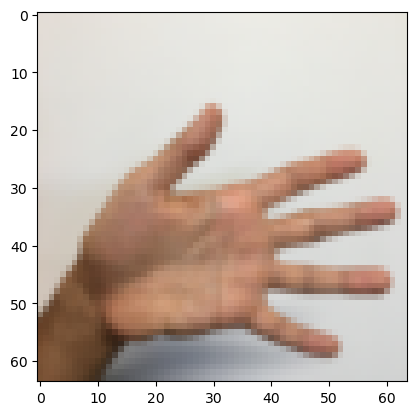

In [4]:
# Example of a picture
index = 0
plt.imshow(train_set_x_orig[index])
print ("y = " + str(np.squeeze(train_set_y_orig[:, index])))

In [5]:
print(train_set_x_orig[0].shape)

(64, 64, 3)


# Normalisation

In [6]:
print('Valeur maximum de nos images : ',np.min(train_set_x_orig))
print('Valeur minimum de nos images : ', np.max(train_set_x_orig))

X_train = train_set_x_orig.astype('float32')/255
X_test = test_set_x_orig.astype('float32')/255

print('Valeur maximum de nos images normalisées : ',np.min(X_train))
print('Valeur minimum de nos images normalisées : ',np.max(X_train))

Valeur maximum de nos images :  4
Valeur minimum de nos images :  244
Valeur maximum de nos images normalisées :  0.015686275
Valeur minimum de nos images normalisées :  0.95686275


In [7]:
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(1, 1080)
(1, 120)


In [8]:
Y_train = np.eye(6)[train_set_y_orig.reshape(-1)]
Y_test = np.eye(6)[test_set_y_orig.reshape(-1)]
print(Y_train[150, :])
print((train_set_y_orig[:, 150]))

[0. 0. 0. 1. 0. 0.]
[3]


# Construction du modèle

In [9]:
model = Sequential()

ajout de couche de convolution

In [10]:
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))

ajouter une couche de max-pooling

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

transformer ces représentations en vecteur

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(6, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 6)                 172806    
                                                                 
Total params: 182950 (714.65 KB)
Trainable params: 182950 (714.65 KB)
Non-trainable params: 0 (0.00 Byte)
________________

# entraînement du modèle

In [15]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, Y_train,
          epochs = 100,
          validation_data=(X_test, Y_test),
          verbose=1)


Epoch 1/100



34/34 [==============================] - 1s 21ms/step - loss: 1.8112 - accuracy: 0.1694 - val_loss: 1.7844 - val_accuracy: 0.1750
Epoch 2/100
34/34 [==============================] - 1s 16ms/step - loss: 1.7688 - accuracy: 0.2296 - val_loss: 1.7556 - val_accuracy: 0.1667
Epoch 3/100
34/34 [==============================] - 1s 16ms/step - loss: 1.7228 - accuracy: 0.2796 - val_loss: 1.7122 - val_accuracy: 0.1667
Epoch 4/100
34/34 [==============================] - 1s 16ms/step - loss: 1.6696 - accuracy: 0.3250 - val_loss: 1.5870 - val_accuracy: 0.4000
Epoch 5/100
34/34 [==============================] - 1s 16ms/step - loss: 1.5618 - accuracy: 0.3861 - val_loss: 1.4702 - val_accuracy: 0.5250
Epoch 6/100
34/34 [==============================] - 1s 16ms/step - loss: 1.4261 - accuracy: 0.4667 - val_loss: 1.3948 - val_accuracy: 0.4833
Epoch 7/100
34/34 [==============================] - 1s 16ms/step - loss: 1.3224 - accuracy: 0.5074 - val_loss: 1.3610 - val_accuracy: 0.4583
Epoch 8/100
34/34 

34/34 [==============================] - 1s 19ms/step - loss: 1.6586 - accuracy: 0.6880 - val_loss: 0.8097 - val_accuracy: 0.7333
Epoch 59/100
34/34 [==============================] - 1s 19ms/step - loss: 0.5195 - accuracy: 0.8389 - val_loss: 0.7812 - val_accuracy: 0.7667
Epoch 60/100
34/34 [==============================] - 1s 19ms/step - loss: 0.4720 - accuracy: 0.8333 - val_loss: 0.6431 - val_accuracy: 0.8167
Epoch 61/100
34/34 [==============================] - 1s 20ms/step - loss: 1.9530 - accuracy: 0.5843 - val_loss: 0.8105 - val_accuracy: 0.7583
Epoch 62/100
34/34 [==============================] - 1s 19ms/step - loss: 0.4696 - accuracy: 0.8667 - val_loss: 0.6729 - val_accuracy: 0.8000
Epoch 63/100
34/34 [==============================] - 1s 20ms/step - loss: 0.3573 - accuracy: 0.8833 - val_loss: 0.7862 - val_accuracy: 0.7417
Epoch 64/100
34/34 [==============================] - 1s 19ms/step - loss: 0.3364 - accuracy: 0.8944 - val_loss: 0.7153 - val_accuracy: 0.7333
Epoch 65/100

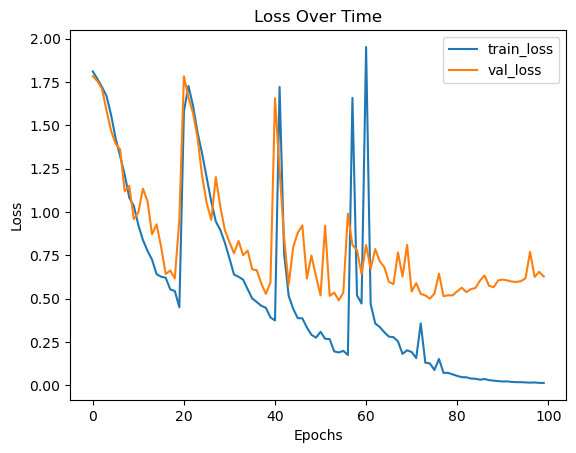

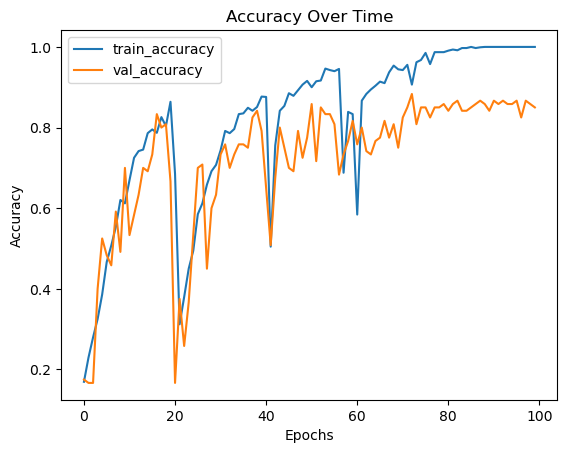

In [16]:
# Récupérer les métriques d'entraînement et de validation
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Visualiser l'évolution de la perte (loss) sur les ensembles d'entraînement et de validation
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

# Visualiser l'évolution de la précision (accuracy) sur les ensembles d'entraînement et de validation
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

==> Overfitting

# EarlyStopping

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Compilation du modèle
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

# Définition de l'arrêt anticipé
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle avec l'arrêt anticipé
history = model.fit(X_train, Y_train,
                    epochs=100,
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 21ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.6516 - val_accuracy: 0.8500
Epoch 2/100
34/34 [==============================] - 1s 16ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.6545 - val_accuracy: 0.8667
Epoch 3/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.6352 - val_accuracy: 0.8667
Epoch 4/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.6335 - val_accuracy: 0.8750
Epoch 5/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6495 - val_accuracy: 0.8667
Epoch 6/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.6621 - val_accuracy: 0.8750
Epoch 7/100
34/34 [==============================] - 1s 17ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.6440 - val_accuracy: 0.8750
Epoch 

==> Encore Overfitting

# Data Augmentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# Création d'un générateur d'images augmentées
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotation aléatoire dans la plage de 0 à 20 degrés
    width_shift_range=0.1,  # Décalage horizontal aléatoire de 10% de la largeur de l'image
    height_shift_range=0.1, # Décalage vertical aléatoire de 10% de la hauteur de l'image
    shear_range=0.2,        # Transformation de cisaillement aléatoire
    zoom_range=0.2,         # Zoom aléatoire dans la plage de 0.8x à 1.2x
    horizontal_flip=True,   # Retournement horizontal aléatoire
    fill_mode='nearest'     # Mode de remplissage pour les pixels nouvellement créés
)

# Adapter le générateur aux données d'entraînement
datagen.fit(X_train)
batch_size = 32 
# Entraîner le modèle en utilisant le générateur augmenté
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=100,
                    validation_data=(X_test, Y_test),
                    verbose=1)


Epoch 1/100
33/33 [==============================] - 1s 34ms/step - loss: 3.3063 - accuracy: 0.2667 - val_loss: 1.5038 - val_accuracy: 0.4167
Epoch 2/100
33/33 [==============================] - 1s 33ms/step - loss: 1.6467 - accuracy: 0.3361 - val_loss: 1.4562 - val_accuracy: 0.4667
Epoch 3/100
33/33 [==============================] - 1s 35ms/step - loss: 1.5468 - accuracy: 0.3778 - val_loss: 1.3021 - val_accuracy: 0.5250
Epoch 4/100
33/33 [==============================] - 1s 34ms/step - loss: 1.4659 - accuracy: 0.4361 - val_loss: 1.4515 - val_accuracy: 0.3667
Epoch 5/100
33/33 [==============================] - 1s 34ms/step - loss: 1.4562 - accuracy: 0.4352 - val_loss: 1.2345 - val_accuracy: 0.5583
Epoch 6/100
33/33 [==============================] - 1s 34ms/step - loss: 1.3957 - accuracy: 0.4620 - val_loss: 1.1616 - val_accuracy: 0.5833
Epoch 7/100
33/33 [==============================] - 1s 34ms/step - loss: 1.3295 - accuracy: 0.4926 - val_loss: 1.1097 - val_accuracy: 0.5667
Epoch 

33/33 [==============================] - 1s 35ms/step - loss: 0.8851 - accuracy: 0.6648 - val_loss: 0.5381 - val_accuracy: 0.8417
Epoch 59/100
33/33 [==============================] - 1s 36ms/step - loss: 0.7822 - accuracy: 0.7046 - val_loss: 0.5362 - val_accuracy: 0.8333
Epoch 60/100
33/33 [==============================] - 1s 38ms/step - loss: 0.7961 - accuracy: 0.7083 - val_loss: 0.5017 - val_accuracy: 0.8417
Epoch 61/100
33/33 [==============================] - 1s 38ms/step - loss: 0.7565 - accuracy: 0.7259 - val_loss: 0.4922 - val_accuracy: 0.8333
Epoch 62/100
33/33 [==============================] - 1s 36ms/step - loss: 0.7833 - accuracy: 0.6907 - val_loss: 0.7405 - val_accuracy: 0.7417
Epoch 63/100
33/33 [==============================] - 1s 36ms/step - loss: 0.8370 - accuracy: 0.6759 - val_loss: 0.4717 - val_accuracy: 0.8333
Epoch 64/100
33/33 [==============================] - 1s 34ms/step - loss: 0.7824 - accuracy: 0.7019 - val_loss: 0.5739 - val_accuracy: 0.8083
Epoch 65/100

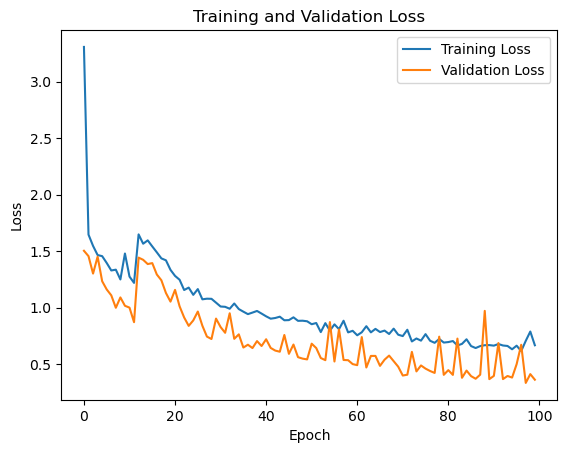

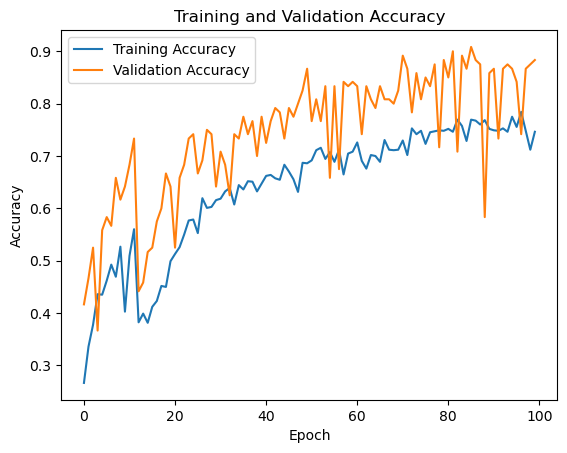

In [19]:
# Tracer la perte sur les ensembles d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer l'exactitude sur les ensembles d'entraînement et de validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# sauvegarder

In [22]:
# Sauvegarder le modèle
model.save("model.h5")


# Exploiter model.h5

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import numpy as np

# Charger les poids du modèle enregistrés
model.load_weights("model.h5")

# Chemin de l'image à partir du jeu de données de test
img_path = r"C:\Users\BAZ INFO\tp_1\zero.png"

# Charger l'image à partir du chemin
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour correspondre à la taille du lot

# Normaliser l'image
img_array = img_array / 255.0

# Faire la prédiction
prediction = model.predict(img_array)

# Afficher la prédiction
print(prediction)
print(np.argmax(prediction))

1/1 [==============================] - 0s 16ms/step
[[9.9894446e-01 4.8684501e-06 2.1507058e-04 6.7991565e-04 1.5568887e-04
  9.2166879e-09]]
0
